<a href="https://colab.research.google.com/github/linkjavier/disco/blob/main/andrew/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os

dir_path = "drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/"

for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schu_143_1.mid
drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schu_143_2.mid
drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schu_143_3.mid
drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schub_d760_1.mid
drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schub_d760_2.mid
drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schub_d760_3.mid
drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schub_d760_4.mid
drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schub_d960_1.mid
drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schub_d960_2.mid
drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schub_d960_3.mid
drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schub_d960_4.mid
drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schubert_D850_1.mid
drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schube

In [ ]:
pip install music21

In [ ]:
from music21 import *

In [ ]:
def read_midi(file):
    print('loading music file:',file)
    notes=[]
    notes_to_parse=None
    midi = converter.parse(file)
    # grouping based on different instruments
    s2=instrument.partitionByInstrument(midi)
    
    for part in s2.parts:
        #select notes of piano
        if 'Piano' in str(part):
            notes_to_parse=part.recurse()
            # finding elemnet is a note or chord
            for element in notes_to_parse:
                
                #note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))
    return np.array(notes)

In [ ]:
files=[i for i in os.listdir(dir_path) if i.endswith('.mid')]

#reading each midi file
notes_array = np.array([read_midi(dir_path+i) for i in files])

loading music file: drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schu_143_1.mid
loading music file: drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schu_143_2.mid
loading music file: drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schu_143_3.mid
loading music file: drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schub_d760_1.mid
loading music file: drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schub_d760_2.mid
loading music file: drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schub_d760_3.mid
loading music file: drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schub_d760_4.mid
loading music file: drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schub_d960_1.mid
loading music file: drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schub_d960_2.mid
loading music file: drive/MyDrive/Colab_Datasets/Portfolio_project/music_dataset/schub_d960_3.mid
loading music file: drive/

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [ ]:
notes_array

array([array(['A4', 'A3', 'E5', ..., '4.9', '9.1.4', '4.9'], dtype='<U8'),
       array(['9.0', '0.5', 'F4', 'F3', 'A4', 'A3', '2', '0', 'G4', '0.4.7',
       '10', '7', '9', '5.9', '9.2', '7.10.0', '0.4', '5.9.0', '0.5',
       'C4', 'C3', 'C#4', 'C4', 'C#3', 'C3', 'B3', 'B2', 'C4', 'C#4',
       'C3', 'C#3', 'C4', 'C3', '9.0', '0.5', 'F4', 'F3', 'A4', 'A3',
       '9.2', '2.5.9', '9.2', '2.5.9', '5', '9', '10.1', '4.7.9', '10.1',
       '4.7.9', '9.0', '5.9', '7.10', 'C5', 'E4', 'C4', '5.9', '5', 'C4',
       'C3', 'C#4', 'C4', 'C#3', 'C3', 'B3', 'B2', 'C4', 'C#4', 'C3',
       'C#3', 'C4', 'C3', 'G3', 'C4', '0.4', 'E4', 'E3', 'G4', 'G3',
       '10.1', '1.4.7', '10.2', 'F2', 'D3', 'F4', 'F3', 'B-4', 'B-3',
       '10.2.5', '10.2', '3.6', 'D3', '9.0', '2.5', 'B-3', '0.5', '9',
       '1.4', '7.10', 'A2', '0.5', 'A3', '5.9', '0.5', '0', 'G4', '0.4.7',
       '10', '7', '9', '5.9', '9.2', '4.7.10', 'C2', 'C3', '5.9', 'F2',
       'C4', 'C3', 'C#4', 'C4', 'C#3', 'C3', 'B3', 'B2', 'C4', 

In [ ]:
notes_=[element for note_ in notes_array for element in note_]
unique_notes=list(set(notes_))
len(unique_notes)

299

In [ ]:
unique_notes[0]

'2.5.9'

(array([190.,  29.,  27.,   7.,  11.,   6.,   6.,  10.,   8.,   5.]),
 array([1.0000e+00, 1.1340e+02, 2.2580e+02, 3.3820e+02, 4.5060e+02,
        5.6300e+02, 6.7540e+02, 7.8780e+02, 9.0020e+02, 1.0126e+03,
        1.1250e+03]),
 <a list of 10 Patch objects>)

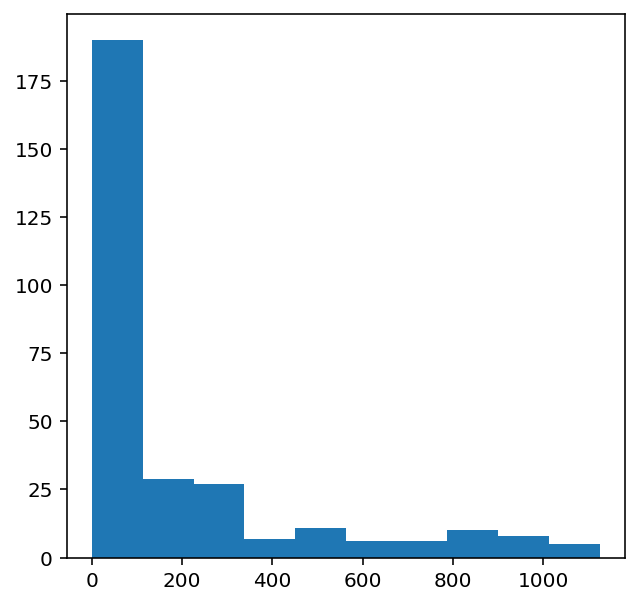

In [ ]:
#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [ ]:
frequent_notes = [note_ for note_, count in freq.items() if count>=50]
print(len(frequent_notes))
frequent_notes

152


['A4',
 'A3',
 'E5',
 'E4',
 'E-5',
 'E-4',
 'C5',
 'C4',
 'B4',
 'B3',
 '4.8.11',
 'E3',
 'C3',
 'A2',
 '5.9',
 'D2',
 '7.10',
 'C#2',
 'B2',
 'E2',
 '0',
 'C2',
 '9',
 'A1',
 '2.5.9',
 '9.0.4',
 'D4',
 'F4',
 'G4',
 '2',
 '4',
 '5',
 '4.7.11',
 '7',
 'G2',
 '11',
 '3.6',
 '11.3',
 'F2',
 'G#2',
 '3',
 '0.4',
 '11.4',
 '4.9',
 '2.7',
 '0.5',
 '8',
 '9.2',
 '1.7',
 '2.8',
 '7.0',
 '5.10',
 '1',
 '10',
 '0.6',
 '7.10.2',
 'D5',
 '8.11',
 '4.8',
 'B1',
 'G#3',
 'G#1',
 'G#4',
 'G#5',
 'B5',
 'E6',
 '6.8',
 '9.1',
 '1.4',
 'C#3',
 'C#4',
 '3.6.9',
 '6.11',
 '4.7',
 '6.9.1',
 '9.0',
 '5.9.0',
 '0.4.7',
 'E-3',
 '9.1.4',
 '10.2.5',
 '0.3.7',
 '0.2.6',
 '5.8.11',
 '7.10.1',
 '10.2',
 '2.5',
 '5.8',
 '5.8.0',
 'C#5',
 'F5',
 'B-5',
 'C6',
 'A5',
 'A6',
 'G6',
 'F6',
 'D6',
 'C#6',
 'G5',
 '1.5.8',
 '8.0.3',
 'F#5',
 '10.1.5',
 '2.4.8',
 'B-3',
 'B-2',
 'D3',
 'F3',
 'G3',
 '5.11',
 'F#3',
 '2.6',
 '6.9',
 'F#4',
 '11.2.6',
 '10.1',
 '4.7.9',
 'B-4',
 'F#2',
 '3.8',
 'E-2',
 '6.10.1',
 '8.1',


In [ ]:
new_music=[]
#it will only contains above most frequnetly used notes
for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)
    new_music.append(temp)
    
new_music = np.array(new_music)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
new_music.shape

(22,)

In [ ]:
new_music

array([list(['A4', 'A3', 'E5', 'E4', 'E-5', 'E-4', 'E5', 'E4', 'C5', 'C4', 'B4', 'B3', 'A4', 'A3', '4.8.11', 'E3', 'C4', 'C3', 'A3', 'A2', 'A3', 'A2', '5.9', 'D2', '7.10', 'C#2', '5.9', 'D2', 'A3', 'A2', 'B3', 'B2', 'C4', 'C3', '4.8.11', 'E2', '0', 'C2', '9', 'A1', '2.5.9', 'A1', '9.0.4', 'A1', 'A3', '2.5.9', 'D4', 'E4', 'A1', 'F4', 'E4', '9.0.4', 'A3', 'A1', 'G4', 'F4', '2.5.9', 'A3', 'A1', 'F4', 'E4', '9.0.4', 'A3', 'A1', 'A3', 'A4', '2.5.9', '2', '4', 'A2', '5', '4', '9.0.4', '9', 'A2', '4', '4.7.11', '7', '9', 'G2', '11', '11', '3.6', '11', '11.3', '7', '7', '4', '4', '11', '3.6', '11', '11.3', '7', '7', '4', '4', '7', 'E2', '4', 'F2', 'E2', 'F2', 'E2', 'F2', 'E2', 'F2', '5', 'E2', 'F2', 'E2', 'F2', 'E2', 'F2', 'E2', 'F2', '2', 'E2', 'F2', 'E2', 'F2', 'E2', 'F2', 'E2', 'F2', '4', 'E2', 'F2', 'E2', 'F2', 'E2', 'F2', 'E2', 'F2', '0', 'E2', 'F2', 'E2', 'F2', 'E2', 'F2', 'E2', 'F2', '2', 'E2', 'F2', 'E2', 'F2', 'E2', 'F2', 'E2', 'F2', '11', 'E2', 'F2', 'E2', 'F2', 'E2', 'F2', 'E2', 'G#

In [ ]:
no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)

In [ ]:
y

array(['C4', 'C3', '4.8.11', ..., 'B-1', '6.10', '1.6'], dtype='<U8')

In [ ]:
x

array([['A4', 'A3', 'E5', ..., 'A2', 'B3', 'B2'],
       ['A3', 'E5', 'E4', ..., 'B3', 'B2', 'C4'],
       ['E5', 'E4', 'E-5', ..., 'B2', 'C4', 'C3'],
       ...,
       ['B-3', '1.6', 'F#3', ..., 'C#2', 'F#2', 'C#2'],
       ['1.6', 'F#3', 'B-3', ..., 'F#2', 'C#2', 'B-1'],
       ['F#3', 'B-3', 'C#4', ..., 'C#2', 'B-1', '6.10']], dtype='<U8')

In [ ]:
unique_x=list(set(x.ravel()))
x_note_to_int=dict((note_,number) for number,note_ in enumerate(unique_x))

In [ ]:
x_note_to_int

{'0': 134,
 '0.2.6': 147,
 '0.3': 126,
 '0.3.5': 9,
 '0.3.6': 149,
 '0.3.7': 142,
 '0.4': 89,
 '0.4.7': 108,
 '0.5': 2,
 '0.6': 116,
 '1': 117,
 '1.3': 148,
 '1.4': 73,
 '1.4.7.10': 80,
 '1.4.8': 62,
 '1.5': 140,
 '1.5.8': 29,
 '1.6': 40,
 '1.7': 95,
 '10': 64,
 '10.1': 136,
 '10.1.5': 115,
 '10.2': 84,
 '10.2.5': 30,
 '10.3': 25,
 '11': 20,
 '11.2': 39,
 '11.2.6': 42,
 '11.3': 137,
 '11.4': 48,
 '2': 90,
 '2.4': 135,
 '2.4.8': 88,
 '2.5': 92,
 '2.5.9': 0,
 '2.6': 112,
 '2.6.9': 87,
 '2.7': 79,
 '2.8': 130,
 '3': 121,
 '3.6': 32,
 '3.6.9': 146,
 '3.7': 123,
 '3.7.10': 49,
 '3.8': 124,
 '4': 65,
 '4.7': 37,
 '4.7.11': 94,
 '4.7.9': 13,
 '4.8': 98,
 '4.8.11': 51,
 '4.9': 6,
 '5': 59,
 '5.10': 125,
 '5.11': 60,
 '5.8': 41,
 '5.8.0': 17,
 '5.8.11': 110,
 '5.9': 96,
 '5.9.0': 66,
 '6': 72,
 '6.10': 138,
 '6.10.1': 113,
 '6.11': 76,
 '6.8': 18,
 '6.9': 1,
 '6.9.1': 119,
 '7': 5,
 '7.0': 26,
 '7.10': 55,
 '7.10.1': 127,
 '7.10.2': 145,
 '7.11': 69,
 '7.11.2': 21,
 '7.9': 54,
 '7.9.1': 144,
 '

In [ ]:
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)

In [ ]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

In [ ]:
x_seq

array([[ 67,  75,  11, ...,  71,  58,  56],
       [ 75,  11,  68, ...,  58,  56,  50],
       [ 11,  68,  27, ...,  56,  50,  57],
       ...,
       [132,  40,  10, ...,   4,  70,   4],
       [ 40,  10, 132, ...,  70,   4, 114],
       [ 10, 132, 133, ...,   4, 114, 138]])

In [ ]:
y_seq

array([ 50,  57,  51, ..., 114, 138,  40])

In [ ]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [ ]:
def lstm():
  model = Sequential()
  model.add(LSTM(128,return_sequences=True))
  model.add(LSTM(128))
  model.add(Dense(256))
  model.add(Activation('relu'))
  model.add(Dense(n_vocab))
  model.add(Activation('softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
  return model

In [ ]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K

K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 100)           15200     
_________________________________________________________________
conv1d (Conv1D)              (None, 32, 64)            19264     
_________________________________________________________________
dropout (Dropout)            (None, 32, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 128)           24704     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 128)            0

In [ ]:
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [ ]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=50, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])

Epoch 1/50
330/330 [==============================] - 30s 86ms/step - loss: 4.3083 - val_loss: 3.9858

Epoch 00001: val_loss improved from inf to 3.98581, saving model to best_model.h5
Epoch 2/50
330/330 [==============================] - 28s 86ms/step - loss: 3.7804 - val_loss: 3.8122

Epoch 00002: val_loss improved from 3.98581 to 3.81219, saving model to best_model.h5
Epoch 3/50
330/330 [==============================] - 28s 86ms/step - loss: 3.6144 - val_loss: 3.7257

Epoch 00003: val_loss improved from 3.81219 to 3.72571, saving model to best_model.h5
Epoch 4/50
330/330 [==============================] - 28s 85ms/step - loss: 3.4941 - val_loss: 3.5842

Epoch 00004: val_loss improved from 3.72571 to 3.58420, saving model to best_model.h5
Epoch 5/50
330/330 [==============================] - 28s 85ms/step - loss: 3.3877 - val_loss: 3.4961

Epoch 00005: val_loss improved from 3.58420 to 3.49614, saving model to best_model.h5
Epoch 6/50
330/330 [==============================] - 28s 8

In [ ]:
from keras.models import load_model
model=load_model('best_model.h5')

In [ ]:
import random
ind=np.random.randint(0,len(x_val)-1)
random_music=x_val[ind]
predictions=[]
for i in range(50):
    
    random_music = random_music.reshape(1,no_of_timesteps)
    prob=model.predict(random_music)[0]
    
    
    y_pred=np.argmax(prob,axis=0)
    predictions.append(y_pred)
    
    
    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

[22, 22, 22, 22, 22, 46, 46, 3, 3, 41, 41, 41, 41, 41, 41, 108, 108, 108, 108, 108, 108, 14, 118, 8, 50, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 151, 8, 151, 8, 8, 8, 8, 8, 151, 8, 8, 8, 66, 8, 66]


In [ ]:
x_int_to_note= dict((number,note_) for number,note_ in enumerate(unique_x))
predicted_notes=[x_int_to_note[i] for i in predictions]

In [ ]:
predicted_notes

['B-4',
 'B-4',
 'B-4',
 'B-4',
 'B-4',
 'F4',
 'F4',
 'G#4',
 'G#4',
 '5.8',
 '5.8',
 '5.8',
 '5.8',
 '5.8',
 '5.8',
 '0.4.7',
 '0.4.7',
 '0.4.7',
 '0.4.7',
 '0.4.7',
 '0.4.7',
 'G4',
 'E2',
 'C6',
 'C4',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'F6',
 'C6',
 'F6',
 'C6',
 'C6',
 'C6',
 'C6',
 'C6',
 'F6',
 'C6',
 'C6',
 'C6',
 '5.9.0',
 'C6',
 '5.9.0']

In [ ]:
def convert_to_midi(prediction_output):
   
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                
                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
                
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
            
        # pattern is a note
        else:
            
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='output')

In [ ]:
convert_to_midi(predicted_notes)